In [2]:
import pandas
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error


In [6]:
# Question 1 & 2
housing = pandas.read_csv('kc_house_data.csv')
print('Column Names\tData Types')
print(housing.dtypes)

Column Names	Data Types
id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


In [7]:
# Question 3 - Numerical Features
#TODO - ask if we can just count how many numerical features 
print(f'Count of Numerical Features = {len(housing.columns) - 1}')

Count of Numerical Features = 20


In [8]:
# Question 4 - Correlation Rankings
    # 1 - sqft_living
    # 2 - grade
    # 3 - sqft_above
    # 4 - sqft_living15
    # 5 - bathrooms
housing.corr(method='pearson')

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


In [1]:
# Question 5 - Graphs of Numerical Features
# TODO - how to change endpoints of graph, do we need to make graphs individually instead of for-loop
for feature in housing.columns:
    if feature == 'price':
        continue
    plt.figure(figsize=(20, 6))
    plt.bar(housing[feature], housing['price'], ',', markersize=1)
    plt.ylabel('price')
    plt.xlabel(feature)
    plt.title(feature + ' vs price')
    plt.show()
# Question 6 - Features with Linear Relationship
    # 1 - sqft_living
    # 2 - grade
    # 3 - sqft_above
    # 4 - sqft_living15
    # 5 - bathrooms

NameError: name 'housing' is not defined

sqft_living vs price
intercept = -43580.743094477104
coefficient = [280.6235679]
mean squared error = 68351286833.03984


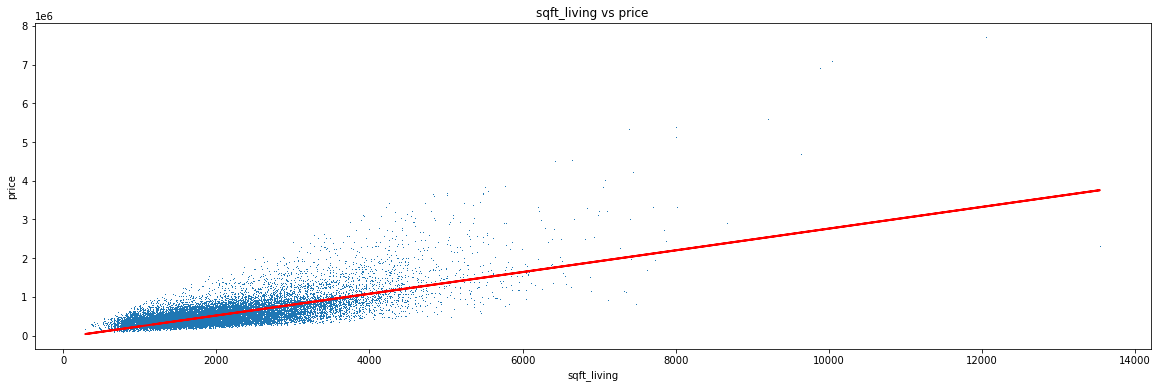

grade vs price
intercept = -1056044.97700979
coefficient = [208457.56245838]
mean squared error = 74737618184.69678


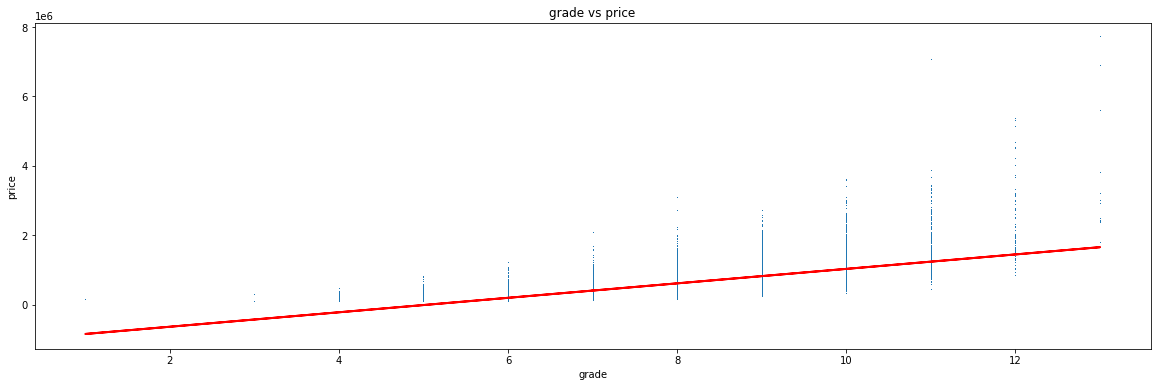

sqft_above vs price
intercept = 59953.192047001445
coefficient = [268.47318776]
mean squared error = 85352146869.2516


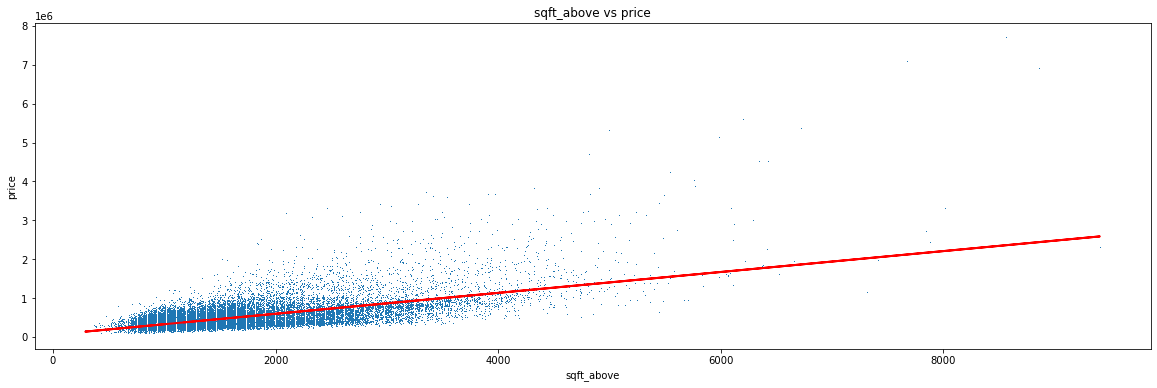

sqft_living15 vs price
intercept = -82807.19520853774
coefficient = [313.55594157]
mean squared error = 88592609022.50156


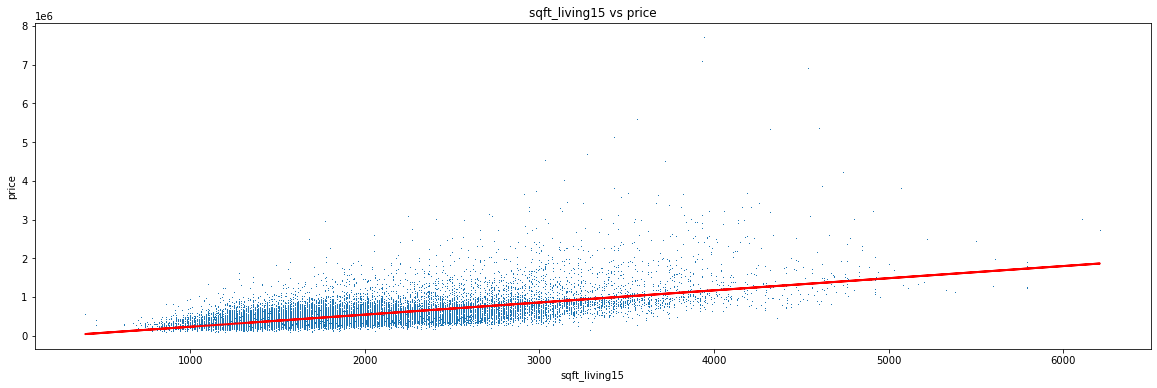

bathrooms vs price
intercept = 10708.308530379669
coefficient = [250326.5163021]
mean squared error = 97609006404.64667


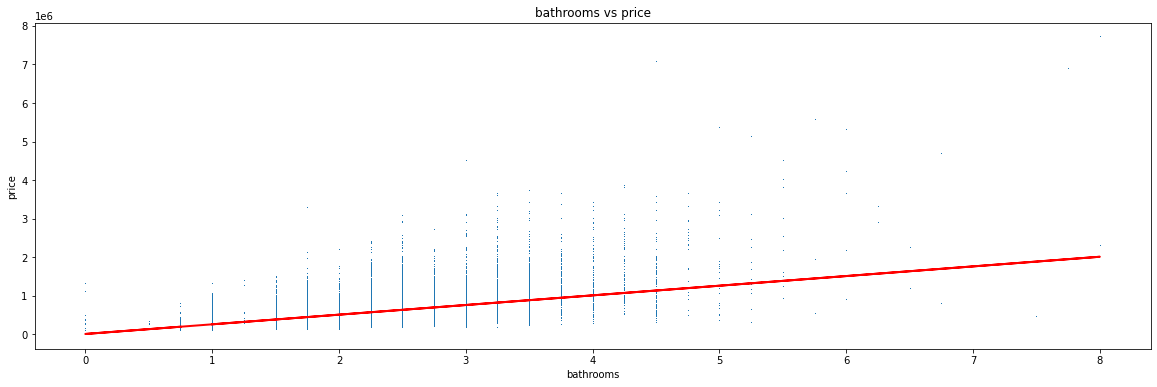

In [15]:
# Question 7 - Linear Regression Algorithm
# TODO - ask why 'total_bedrooms' broke code
# TODO - ask why we have to select different features from question 6
    # 1 - sqft_living
    # 2 - grade
    # 3 - sqft_above
    # 4 - sqft_living15
    # 5 - bathrooms

linear_feature = ['sqft_living', 'grade', 'sqft_above', 'sqft_living15','bathrooms']

for f in linear_feature:
    # initialize and fit model
    predictors = [f]
    x = housing[predictors]
    y = housing['price']
    lm = LinearRegression()
    model = lm.fit(x, y)

    # information line of best fit
    print(f'{f} vs price')
    print(f'intercept = {model.intercept_}')
    print(f'coefficient = {model.coef_}')
    
    # error function results
    pred_y = model.predict(x)
    print(f'mean squared error = {mean_squared_error(y, pred_y)}')
    
    # plot actual data against line of best fit
    plt.figure(figsize=(20, 6))
    plt.plot(housing[f], housing['price'], ',', markersize=1, scalex=600)
    plt.plot(housing[f], pred_y, 'r', linewidth=2)   # regression line
    plt.ylabel('price')
    plt.xlabel(f)
    plt.title(f + ' vs price')
    plt.show()